In [1]:
import pickle
import numpy as np

In [2]:
walks = pickle.load(open('data/walks.pkl', 'rb'))

In [3]:
walk_lens = [len(walk) for walk in walks]
max(walk_lens), np.average(walk_lens), np.median(walk_lens)

(12, 2.8448774360262714, 3.0)

In [4]:
walks[np.argmax(walk_lens)]

array([14857, 11162, 18705, 19193, 12736, 15727, 13090,  4089,  6345,
       20524, 15311, 11537], dtype=int32)

In [12]:
from ctdne import EmbeddingModel

embedding_model = EmbeddingModel(
    num_walks=50,
    len_walk=100,
    random_picker_type="Linear",
    d_embed=128,
)

In [13]:
from test import read_data

data = read_data()
embedding_model.add_temporal_edges(data)

In [14]:
from networkx.classes import DiGraph

networkx_graph: DiGraph = embedding_model.temporal_walk.to_networkx()

In [25]:
from collections import deque

def get_path_length_distribution(graph):
    path_lengths = []
    
    for start_node in graph.nodes():
        queue = deque([(start_node, 0, float('-inf'))])
        visited = set()  # (node, length) pairs
        
        while queue:
            node, length, current_time = queue.popleft()
            path_lengths.append(length)
            
            for _, next_node, data in graph.edges(node, data=True):
                timestamp = data['timestamp']
                if timestamp > current_time:
                    new_length = length + 1
                    # Avoid cycles and limit path length
                    if (next_node, new_length) not in visited and new_length <= len(graph):
                        visited.add((next_node, new_length))
                        queue.append((next_node, new_length, timestamp))
    
    return path_lengths

In [26]:
path_lens = get_path_length_distribution(networkx_graph)

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_distribution(arr):
    mean, std_dev = np.mean(arr), np.std(arr)


    x = np.linspace(min(arr), max(arr), 1000)

    # Compute the Gaussian distribution (PDF)
    pdf = norm.pdf(x, mean, std_dev)

    # Plot the histogram and Gaussian fit
    plt.hist(arr, bins=30, density=True, alpha=0.6, label='Histogram')
    plt.plot(x, pdf, 'r-', label=f'Gaussian Fit Mean: {mean:.2f}, StdDev: {std_dev:.2f}')

    # Add labels and legend
    plt.title("Gaussian Distribution of Array")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

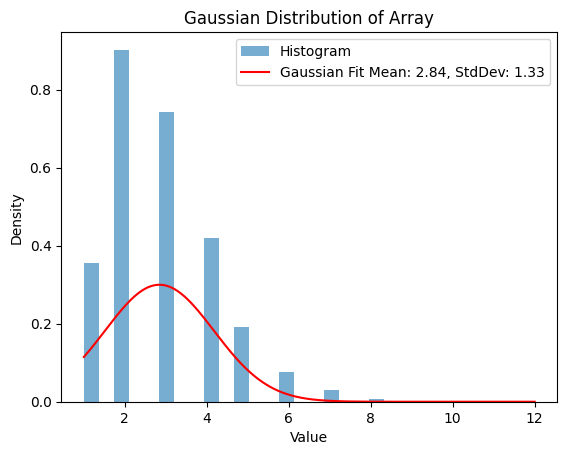

In [18]:
plot_gaussian_distribution(walk_lens)

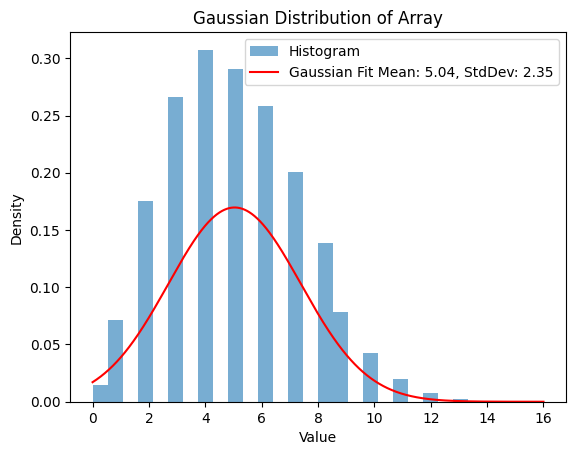

In [27]:
plot_gaussian_distribution(path_lens)